# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

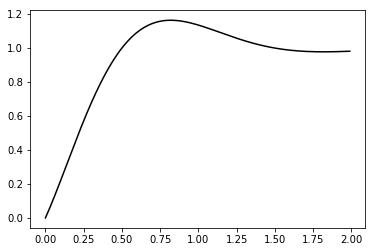

In [3]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)
G_m = 0
t0 = 0

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()


Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

# Solution:


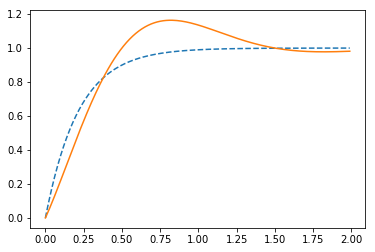


(1)When a= [ 4.60360311] , minimum of L2 norm = 0.15045943934

(2)The residual mean squared error = 0.01131902144320947


In [8]:
from scipy.integrate import quad
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

def f(a, t) :
    return 1 - np.exp(-a*t)
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

def p(t, a):
    return np.square(f(a, t)-g(t))

def q(a):
    y, err = quad(p, 0, 2, args=(a,))
    return y

def L2(a):
    return np.sqrt(q(a))

a0 = minimize(L2,5)
a1 = a0.x
L2_Norm = L2(a1)
MSE = q(a1)/2

t1 = np.arange(0.0, 2.0, 0.01)
plt.figure(2)
plt.plot(t1, f(a1, t1),'--')
plt.plot(t1, g(t1),'-')
plt.show()

print("\n(1)When a=", a1, ", minimum of L2 norm =", L2_Norm )
print("\n(2)The residual mean squared error =", MSE)


(3)According to the definition of $L2$ norm, first we integrate t over the square of difference value between function f(t) and g(t) by the function quad in scipy. Then we can calculate the minimum $L2$ norm: $L2=sqrt [ quad((g(t)-f(t))^2) ] $. If we use minimize function to find the minimum integration, we find the minimun $L2$ norm along with a.  

